In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
fifa_dataset = pd.read_csv('/content/gdrive/My Drive/Google Research/Learning/Kaggle Projects/FIFA19 dataset/data.csv')

In [0]:
#fifa_dataset['Overall Range'] =  fifa_dataset['Overall'].apply(groups)
fifa_dataset['Overall Range'] = fifa_dataset.Overall.map(lambda x: '40-49' if x in range(40,49) 
                                                         else ('50-59' if x in range(50,59) 
                                                               else ('60-69' if x in range (60,69) 
                                                                     else('70-79' if x in range(70,79) 
                                                                          else('80-89' if x in range(80,89) 
                                                                               else'90-94')))))

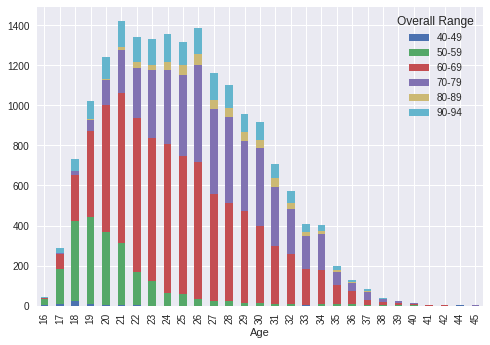

In [12]:
fifa_dataset.groupby(['Age','Overall Range']).size().unstack().plot.bar(stacked=True)

In [0]:
#for easier visualization
fifa_dataset['Speed Range'] =  fifa_dataset.SprintSpeed.map(lambda x: '10-19' if x in range(10,19) 
                                                         else ('20-29' if x in range(50,59) 
                                                               else ('30-39' if x in range (60,69) 
                                                                     else('40-49' if x in range(70,79) 
                                                                          else('50-59' if x in range(80,89) 
                                                                               else('60-69' if x in range(60,69)
                                                                                   else('70-79' if x in range(70,79)
                                                                                       else('80-89' if x in range(80,89)
                                                                                           else '90-97'))))))))

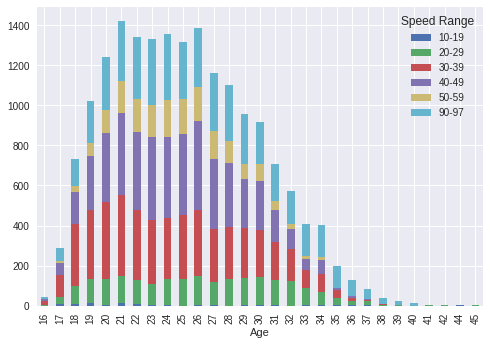

In [14]:
#visualizing speed distribution by age
fifa_dataset.groupby(['Age','Speed Range']).size().unstack().plot.bar(stacked=True)

In [0]:
fifa_dataset['Height']= fifa_dataset.Height.str.replace("'",".").apply(lambda x: float(x)*30.48).dropna()
fifa_dataset['Height']= fifa_dataset['Height'].fillna(fifa_dataset['Height'].mean()).astype(np.int64)


Distribution of players by weight
avoid dropping na values because that will create issues when trying to find correlation. We will have uneven columns to compare
fill nan values with 0 instead

In [0]:
fifa_dataset['Weight'] = fifa_dataset.Weight.str.replace("lbs", "").apply(lambda x: float(x)*0.45359237).dropna()
fifa_dataset['Weight']  = fifa_dataset['Weight'].fillna(fifa_dataset['Weight'].mean()).astype(np.int64)

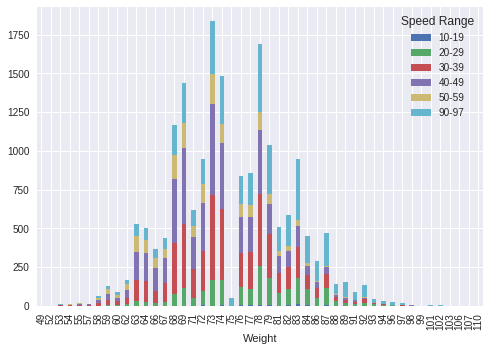

In [0]:
#visualizing speed range distribution by weight
fifa_dataset.groupby(['Weight','Speed Range']).size().unstack().plot.bar(stacked=True)

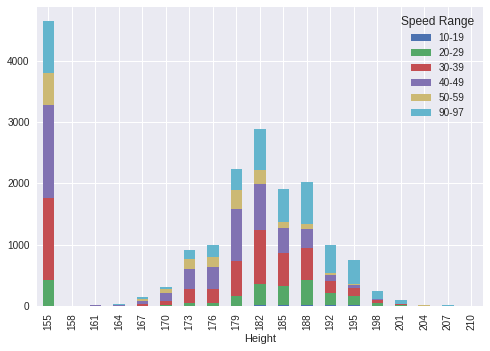

In [16]:
#visualizing speed range distribution by height
fifa_dataset.groupby(['Height','Speed Range']).size().unstack().plot.bar(stacked=True)

In [0]:
def func(x):
  x = x.fillna(x.mean()).astype(np.int64)
  return x
fifa_dataset[['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions','SprintSpeed']] = func(fifa_dataset[['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions','SprintSpeed']])

If corr is less than 0.50/ -0.50, I am leaving it out

In [42]:
#Testing for moderate to strong correlations
def corr_test(x):
  x_corr = stats.spearmanr(x, fifa_dataset['SprintSpeed'])
  return x_corr

SpearmanrResult(correlation=0.5814411492067468, pvalue=0.0)

#**Multivariable linear regression to try and predict player sprint speed**

formula:
F(X) = a(B1.X1)+(B2.X2)....(B8.X8)+(Bp.Xp)

In [0]:
#80/20 split- 20% training data
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
train, test = train_test_split(fifa_dataset, test_size=0.2)

In [0]:
#independent and dependent variables
features= ['Agility', 'Acceleration', 'Balance','Reactions','Positioning','Skill Moves','BallControl','Crossing','Finishing']
target = 'SprintSpeed'
#model we are using
model = LinearRegression()
#training process
model.fit(train[features], train[target])
model.fit(test[features], test[target])
#mean absolute value for training data
data = train[target]
predict =  model.predict(train[features])
training_error = mean_absolute_error(data, predict)
#mean absolute value for test data
test_data = test[target]
predict_test = model.predict(test[features])
test_data_error = mean_absolute_error(test_data, predict_test)

In [0]:
#we need some metric to measure the accuracy of our regression model
from sklearn.metrics import r2_score
#on training data
true_value = train[target]
predicted_val =  model.predict(train[features])
accuracy = r2_score(true_value, predicted_val)
#on test data
true_value2 = test[target]
predicted_val2 =  model.predict(test[features])
accuracy2 = r2_score(true_value2, predicted_val2)

In [50]:
print('This model accounts for {}% of the training data with mean data error of {}'.format(round(accuracy2*100,2), round(training_error,2)))
print('This model accounts for {}% of the testing data with mean data error of {}'.format(round(accuracy*100,2), round(test_data_error,2)))


This model accounts for 84.96% of the training data with mean data error of 4.08
This model accounts for 85.61% of the testing data with mean data error of 4.2
